In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
metrics = ['in', 'out', 'current', 'existing', 'creating', 'averageLatency']
smoothed = ['in', 'out']

def format_data(df):
    df['elapse'] = pd.to_timedelta(df['elapse'], unit='ms')
    return df.set_index('elapse')

In [3]:
df = pd.read_csv("../algorithm-simulator/out/status.csv")
df = format_data(df)

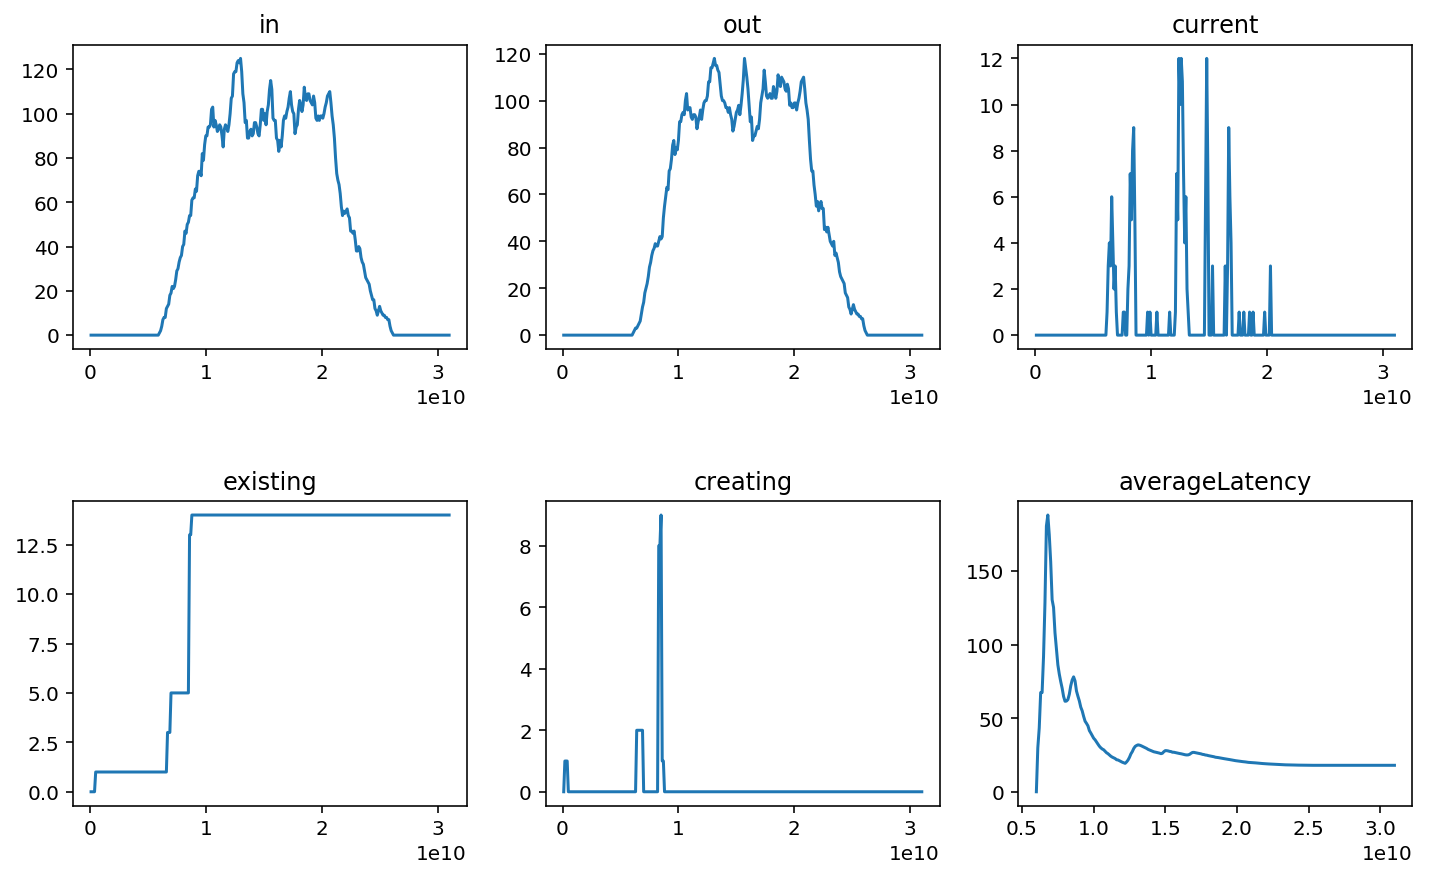

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7))
fig.subplots_adjust(hspace=0.5)
for i, ax in enumerate(axes.flatten()):
    name = metrics[i]
    x, y = df.index.values, df[name]
    if name in smoothed:
        # convert msg/tick to msg/second
        y = y.rolling('1s').sum()
    ax.plot(x, y)
    ax.set_title(name)
plt.show()